In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


In [28]:
photos = pd.read_csv("/content/drive/MyDrive/Dataset/archive/photos.csv")
likes = pd.read_csv("/content/drive/MyDrive/Dataset/archive/likes.csv")
comments = pd.read_csv("/content/drive/MyDrive/Dataset/archive/comments.csv")
follows = pd.read_csv("/content/drive/MyDrive/Dataset/archive/follows.csv")
photo_tags = pd.read_csv("/content/drive/MyDrive/Dataset/archive/photo_tags.csv")
tags = pd.read_csv("/content/drive/MyDrive/Dataset/archive/tags.csv")
users = pd.read_csv("/content/drive/MyDrive/Dataset/archive/users.csv")


In [29]:
photos.head(), photos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 257 non-null    int64 
 1   image link         257 non-null    object
 2   user ID            257 non-null    int64 
 3   created dat        257 non-null    object
 4   Insta filter used  257 non-null    object
 5   photo type         257 non-null    object
dtypes: int64(2), object(4)
memory usage: 12.2+ KB


(   id            image link  user ID       created dat Insta filter used  \
 0   1     http://elijah.biz        1  13-04-2023 08:04               yes   
 1   2    https://shanon.org        1  13-04-2023 08:04                no   
 2   3      http://vicky.biz        1  13-04-2023 08:04                no   
 3   4      http://oleta.net        1  13-04-2023 08:04                no   
 4   5  https://jennings.biz        1  13-04-2023 08:04               yes   
 
   photo type  
 0      photo  
 1      photo  
 2      photo  
 3      photo  
 4      photo  ,
 None)

In [30]:
photos["created_at"] = pd.to_datetime(photos["created dat"], format="%d-%m-%Y %H:%M")

photos["hour"] = photos["created_at"].dt.hour
photos["day"] = photos["created_at"].dt.day_name()

In [31]:
likes_count = likes.groupby("photo").size().reset_index(name="likes_count")
comments_count = comments.groupby("Photo id").size().reset_index(name="comments_count")

df = photos.merge(likes_count, left_on="id", right_on="photo", how="left") \
           .merge(comments_count, left_on="id", right_on="Photo id", how="left")

df["likes_count"] = df["likes_count"].fillna(0)
df["comments_count"] = df["comments_count"].fillna(0)
df["engagement"] = df["likes_count"] + df["comments_count"]

df.head()

,id,image link,user ID,created dat,Insta filter used,photo type,created_at,hour,day,photo,likes_count,Photo id,comments_count,engagement
0,1,http://elijah.biz,1,13-04-2023 08:04,yes,photo,2023-04-13 08:04:00,8,Thursday,1,25,1,25,50
1,2,https://shanon.org,1,13-04-2023 08:04,no,photo,2023-04-13 08:04:00,8,Thursday,2,36,2,31,67
2,3,http://vicky.biz,1,13-04-2023 08:04,no,photo,2023-04-13 08:04:00,8,Thursday,3,38,3,27,65
3,4,http://oleta.net,1,13-04-2023 08:04,no,photo,2023-04-13 08:04:00,8,Thursday,4,38,4,32,70
4,5,https://jennings.biz,1,13-04-2023 08:04,yes,photo,2023-04-13 08:04:00,8,Thursday,5,31,5,27,58


In [32]:
photos = pd.read_csv("/content/drive/MyDrive/Dataset/archive/photos.csv")
likes = pd.read_csv("/content/drive/MyDrive/Dataset/archive/likes.csv")
comments = pd.read_csv("/content/drive/MyDrive/Dataset/archive/comments.csv")
follows = pd.read_csv("/content/drive/MyDrive/Dataset/archive/follows.csv")
photo_tags = pd.read_csv("/content/drive/MyDrive/Dataset/archive/photo_tags.csv")
tags = pd.read_csv("/content/drive/MyDrive/Dataset/archive/tags.csv")
users = pd.read_csv("/content/drive/MyDrive/Dataset/archive/users.csv")

print("Columns in follows DataFrame:", follows.columns)
user_followers = follows.groupby("followee ")["follower"].count().reset_index(name="followers")

df = df.merge(user_followers, left_on="user ID", right_on="followee ", how="left")
df["engagement_rate"] = (df["engagement"] / df["followers"]) * 100

Columns in follows DataFrame: Index(['follower', 'followee ', 'created time', 'is follower active',
       'followee Acc status'],
      dtype='object')


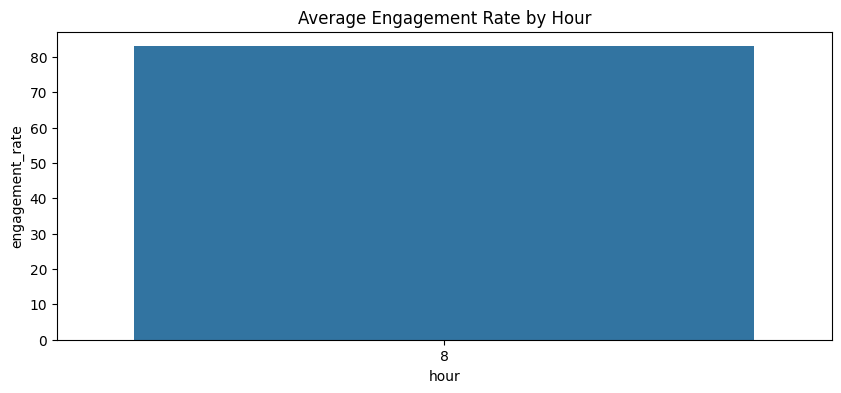

In [33]:
hourly = df.groupby("hour")["engagement_rate"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.barplot(x="hour", y="engagement_rate", data=hourly)
plt.title("Average Engagement Rate by Hour")
plt.show()

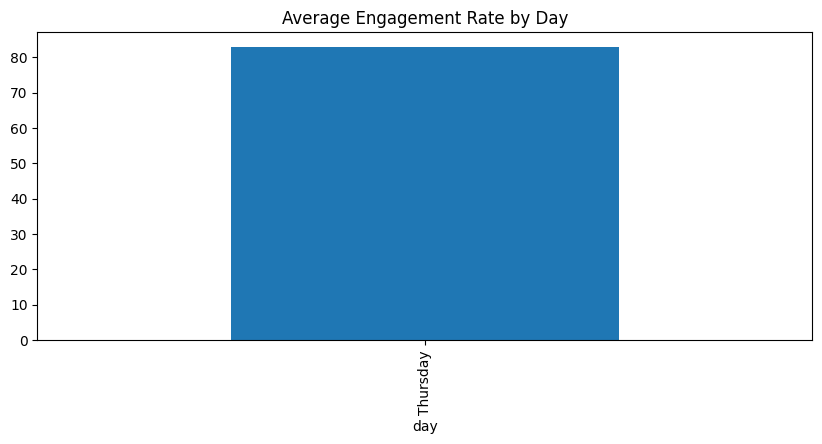

In [34]:
daily = df.groupby("day")["engagement_rate"].mean()

plt.figure(figsize=(10,4))
daily.plot(kind="bar")
plt.title("Average Engagement Rate by Day")
plt.show()


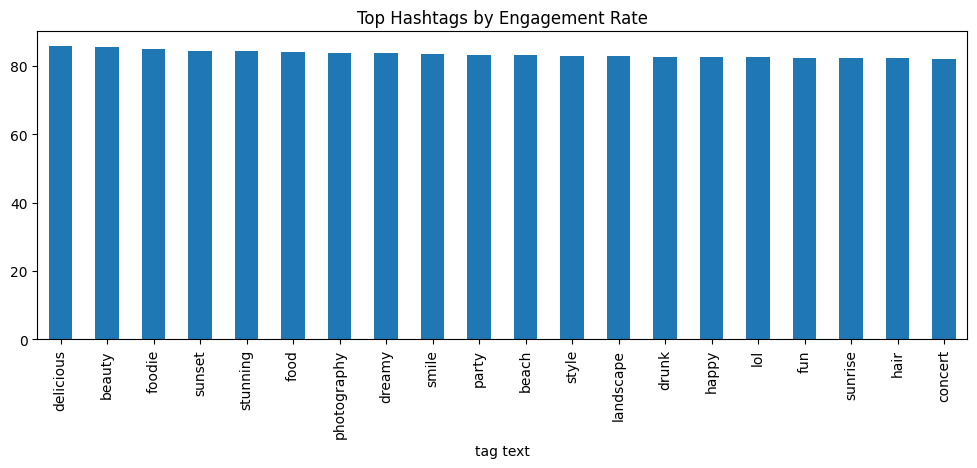

In [38]:
df_tags = photo_tags.merge(tags, left_on="tag ID", right_on="id")
df_tags = df_tags.merge(df[["id", "engagement_rate"]], left_on="photo", right_on="id")

top_hashtags = df_tags.groupby("tag text")["engagement_rate"].mean() \
                      .sort_values(ascending=False).head(20)

top_hashtags.plot(kind="bar", figsize=(12,4))
plt.title("Top Hashtags by Engagement Rate")
plt.show()

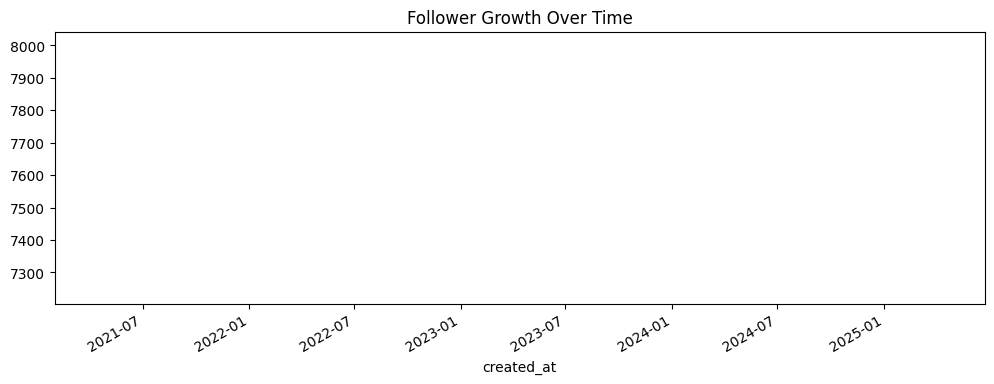

In [42]:
follows["created_at"] = pd.to_datetime(follows["created time"], format="%d-%m-%Y %H:%M")
followers_over_time = follows.groupby("created_at").size()

followers_over_time.plot(figsize=(12,4))
plt.title("Follower Growth Over Time")
plt.show()

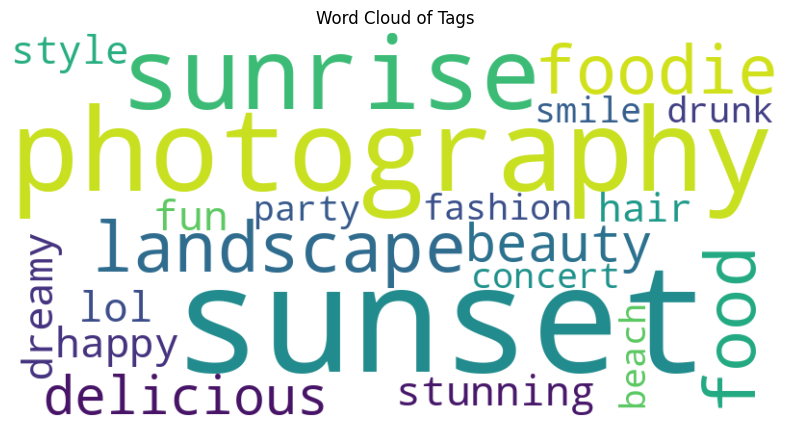

In [44]:
text_tags = " ".join(tags["tag text"].dropna())
wc_tags = WordCloud(width=800, height=400, background_color="white").generate(text_tags)

plt.figure(figsize=(10,5))
plt.imshow(wc_tags, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Tags")
plt.show()